# SVC : Sign Language Digits

## We charge the Libs

In [7]:
import pandas as pd
import numpy as np
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from time import time

## we load ours data

In [8]:
x_full = np.load('X.npy')
y_full = np.load('Y.npy')

## We split ours data in train and dev set with a fixed seed

In [9]:
fixed_state = 42
x_train, x_dev = train_test_split(x_full, test_size = 0.3, random_state=fixed_state)
y_train, y_dev = train_test_split(y_full, test_size = 0.3, random_state=fixed_state)
x_train.shape
x_dev.shape
y_train.shape
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## We reshape the x in a 2d array 

In [10]:
x_train_flat = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_dev_flat = x_dev.reshape(x_dev.shape[0], x_dev.shape[1]*x_dev.shape[2])

## We reshape the y 

In [11]:
y_train_flat = [list(y).index(1) for y in y_train]
y_dev_flat = [list(y).index(1) for y in y_dev]
y_train_flat

[1,
 4,
 1,
 4,
 9,
 5,
 1,
 1,
 9,
 4,
 7,
 5,
 5,
 0,
 8,
 6,
 4,
 4,
 4,
 2,
 2,
 6,
 3,
 7,
 7,
 6,
 4,
 4,
 4,
 1,
 8,
 6,
 3,
 2,
 4,
 7,
 8,
 7,
 6,
 6,
 7,
 4,
 4,
 6,
 8,
 2,
 5,
 4,
 7,
 4,
 5,
 2,
 6,
 1,
 9,
 1,
 9,
 1,
 2,
 9,
 8,
 1,
 8,
 7,
 0,
 3,
 7,
 9,
 7,
 1,
 2,
 6,
 5,
 8,
 6,
 6,
 5,
 9,
 0,
 9,
 5,
 2,
 2,
 0,
 7,
 3,
 8,
 1,
 7,
 8,
 0,
 8,
 3,
 1,
 0,
 7,
 4,
 4,
 7,
 2,
 2,
 7,
 1,
 8,
 0,
 6,
 4,
 5,
 7,
 8,
 4,
 4,
 4,
 9,
 8,
 1,
 2,
 8,
 5,
 4,
 4,
 0,
 6,
 6,
 0,
 7,
 9,
 2,
 9,
 0,
 7,
 3,
 3,
 1,
 0,
 7,
 6,
 6,
 0,
 4,
 2,
 7,
 0,
 2,
 6,
 1,
 7,
 2,
 7,
 5,
 3,
 0,
 4,
 3,
 7,
 1,
 6,
 7,
 5,
 1,
 2,
 8,
 3,
 8,
 5,
 1,
 3,
 0,
 9,
 1,
 0,
 0,
 2,
 0,
 8,
 7,
 6,
 7,
 6,
 8,
 2,
 8,
 0,
 6,
 8,
 5,
 4,
 5,
 9,
 2,
 1,
 7,
 9,
 6,
 1,
 9,
 8,
 2,
 5,
 1,
 4,
 3,
 7,
 7,
 1,
 2,
 9,
 5,
 1,
 2,
 3,
 1,
 2,
 7,
 5,
 4,
 0,
 7,
 3,
 4,
 6,
 9,
 3,
 7,
 9,
 4,
 7,
 1,
 4,
 2,
 6,
 5,
 1,
 3,
 5,
 0,
 0,
 4,
 9,
 6,
 7,
 1,
 9,
 3,
 7,
 4,
 6,
 1,
 4,
 0,


## We initialyse the model

In [12]:
model = SVC(gamma='scale')

## We  fit the model

In [13]:
t_0 = time()
model.fit(x_train_flat, y_train_flat)
model_time = time() - t_0
print(model_time)

9.968575954437256


## we get prediction in the dev set

In [26]:
predictions = model.predict(x_dev_flat)
predictions

array([3, 9, 3, 9, 0, 0, 8, 2, 5, 9, 4, 9, 7, 1, 2, 3, 0, 5, 0, 7, 0, 2,
       3, 1, 9, 1, 7, 3, 5, 9, 8, 5, 4, 6, 4, 6, 3, 1, 9, 2, 7, 7, 1, 1,
       1, 2, 0, 7, 8, 9, 1, 9, 2, 2, 1, 0, 6, 8, 2, 8, 2, 7, 2, 7, 5, 9,
       2, 2, 9, 4, 1, 1, 2, 7, 4, 9, 9, 5, 3, 8, 2, 9, 2, 0, 0, 0, 0, 4,
       1, 2, 5, 3, 7, 4, 7, 4, 2, 2, 8, 9, 2, 0, 9, 0, 3, 1, 8, 8, 8, 7,
       5, 8, 3, 3, 2, 5, 6, 1, 2, 5, 5, 0, 1, 5, 8, 2, 6, 5, 1, 0, 3, 1,
       9, 9, 8, 3, 8, 9, 5, 8, 2, 2, 2, 6, 6, 1, 6, 2, 5, 4, 9, 2, 5, 2,
       6, 2, 6, 6, 1, 1, 4, 5, 9, 8, 2, 2, 4, 7, 6, 9, 3, 7, 2, 9, 1, 3,
       7, 2, 0, 2, 1, 7, 4, 2, 1, 6, 3, 2, 4, 8, 8, 6, 8, 3, 2, 0, 8, 3,
       8, 1, 4, 7, 0, 2, 2, 4, 2, 5, 8, 8, 9, 0, 2, 8, 5, 3, 1, 3, 5, 0,
       6, 4, 6, 1, 7, 5, 4, 1, 6, 5, 8, 4, 7, 6, 2, 1, 5, 4, 6, 6, 9, 3,
       1, 0, 9, 0, 1, 2, 3, 9, 5, 4, 2, 0, 0, 4, 2, 5, 9, 2, 4, 7, 9, 8,
       3, 7, 3, 7, 7, 1, 1, 1, 4, 9, 2, 7, 7, 3, 6, 7, 5, 3, 6, 9, 1, 9,
       2, 9, 8, 3, 0, 7, 0, 8, 0, 6, 5, 8, 1, 0, 0,

## We count good and bad predictions

In [27]:
predict_ok = []
true = 0
false = 0
for i in range(len(predictions)):
    if predictions[i] == y_dev_flat[i]:
        p = True 
        true += 1
        
    else:
        p = False
        false += 1
    
    predict_ok.append(p)
        
        
predict_ok
print('Nombres de prédictions Valide :',true)
print('Nombres de mauvaise prédictions :',false)

Nombres de prédictions Valide : 518
Nombres de mauvaise prédictions : 101


In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

matrix_conf = confusion_matrix(list(y_dev_flat), predictions)
matrix_conf


array([[54,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 65,  1,  2,  0,  1,  1,  0,  0,  0],
       [ 0,  1, 60,  3,  1,  4,  2,  0,  5,  0],
       [ 0,  1,  5, 51,  1,  0,  2,  0,  3,  0],
       [ 0,  2,  0,  1, 46,  1,  1,  1,  0,  0],
       [ 2,  1,  6,  0,  0, 42,  1,  0,  2,  1],
       [ 2,  1,  9,  7,  0,  1, 41,  0,  1,  3],
       [ 0,  0,  0,  0,  1,  0,  0, 58,  2,  1],
       [ 0,  0,  9,  3,  5,  0,  0,  0, 43,  0],
       [ 1,  0,  0,  0,  0,  0,  2,  0,  0, 58]], dtype=int64)

In [29]:
df_cm = pd.DataFrame(matrix_conf, range(10),
                  range(10))
df_cm

,0,1,2,3,4,5,6,7,8,9
0,54,0,0,0,0,0,1,0,0,0
1,0,65,1,2,0,1,1,0,0,0
2,0,1,60,3,1,4,2,0,5,0
3,0,1,5,51,1,0,2,0,3,0
4,0,2,0,1,46,1,1,1,0,0
5,2,1,6,0,0,42,1,0,2,1
6,2,1,9,7,0,1,41,0,1,3
7,0,0,0,0,1,0,0,58,2,1
8,0,0,9,3,5,0,0,0,43,0
9,1,0,0,0,0,0,2,0,0,58


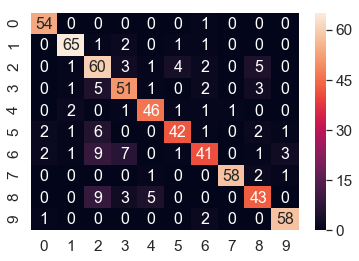

In [30]:
#plt.figure(figsize = (10,10))
sn.set(font_scale=1.4)#for label size
sn.heatmap(matrix_conf, annot=True,annot_kws={"size": 16})# font size

plt.show()

In [31]:
from sklearn.metrics import accuracy_score

print (accuracy_score(y_dev_flat, predictions))

0.8368336025848142
